## 1 - Import the libraries and initialize the datasets.

In [42]:
# given the N and M
n = 1000

### 1.1 - Importing.

In [43]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import imdb
from tqdm import tqdm
import matplotlib.pyplot as plt

### 1.2 - Loading the datasets x_train, y_train, x_test, y_test.

In [44]:
# load dataset 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = n)

# load word_index 
word_index = imdb.get_word_index()

# create the Reverse of word_index 
reverse_index = dict((i + 3, word) for (word, i) in word_index.items())

# init 0,1,2
reverse_index[0] = '[pad]'
reverse_index[1] = '[bos]'
reverse_index[2] = '[oov]'

### 1.3 - Indexing the datasets to words.

In [45]:
# x_train are just indexing numbers
print(x_train[0])

# we indexing the number with the vocabulary
x_train = np.array([' '.join([reverse_index[idx] for idx in text]) for text in x_train])

# now x_train are vocabulary sentences
print()
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]

[bos] this film was just brilliant casting [oov] [oov] story direction [oov] really [oov] the part they played and you could jus

In [46]:
#same with x_test
print(x_test[0])

x_test = np.array([' '.join([reverse_index[idx] for idx in text]) for text in x_test])

print()
print(x_test[0])

[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 2, 394, 354, 4, 123, 9, 2, 2, 2, 10, 10, 13, 92, 124, 89, 488, 2, 100, 28, 2, 14, 31, 23, 27, 2, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 2, 451, 202, 14, 6, 717]

[bos] please give this one a miss br br [oov] [oov] and the rest of the cast [oov] terrible performances the show is [oov] [oov] [oov] br br i don't know how michael [oov] could have [oov] this one on his [oov] he almost seemed to know this wasn't going to work out and his performance was quite [oov] so all you [oov] fans give this a miss


### 1.4.1 - Creating the vocabulary.

In [47]:
vocHelper = list()
for text in x_train:
  tokens = text.split()
  vocHelper.extend(tokens)

#that's all th vocabulary length but we have dublicates
print("with dublicates the size is: ", len(vocHelper))

#so we remove them and we have this length now
vocHelper = set(vocHelper)
print("without dublicates the size is: ",len(vocHelper))

with dublicates the size is:  5967841
without dublicates the size is:  998


### 1.4.2 - Copying the dataset to a 'numpy array' for better use in the future.

In [48]:
vocabulary = np.array

for text in vocHelper:
  vocabulary = np.append(vocabulary,text)  

vocabulary = np.delete(vocabulary, 0)
print(vocabulary)

['best' 'course' 'budget' 'type' 'thriller' 'an' 'writers' 'however'
 'york' 'living' 'above' 'it' 'christmas' 'chance' 'supposed' 'dead'
 'king' 'lee' "don't" 'avoid' 'straight' 'close' 'lady' 'for' 'mr'
 'cheesy' 'maybe' 'but' 'against' 'top' 'while' 'check' 'view' 'moments'
 'elements' 'off' 'money' 'days' 'art' 'goes' 'police' 'opinion' 'back'
 'flick' 'modern' 'except' '3' 'told' '5' 'novel' 'sounds' 'air' 'both'
 'using' 'at' 'scene' 'effects' 'dumb' 'brings' 'played' 'interested'
 'from' 'ok' 'parents' 'anyone' 'reading' 'seemed' 'jack' 'worse' 'e'
 'gave' 'killer' 'street' 'far' 'act' "film's" 'may' 'admit' 'or' 'does'
 "there's" 'game' 'place' 'given' 'can' 'fine' 'little' 'sorry' 'looking'
 '8' 'average' 'short' 'go' 'country' 'shots' 'seems' 'old' 'mess'
 'already' 'this' 'head' 'same' "doesn't" 'through' 'full' 'note' 'local'
 'always' 'upon' 'playing' 'brilliant' 'under' 'features' 'robert' 'much'
 'good' 'waste' 'serious' 'night' 'keep' 'ask' 'suspense' 'comments'
 'ameri

## 2 - Create binary vectors. (x_train_binary, x_test_binary).

In [49]:
x_train_binary = list()
x_test_binary = list()

for text in tqdm(x_train):
  tokens = text.split()
  binary_vector = list()
  for vocab_token in vocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_train_binary.append(binary_vector)

x_train_binary = np.array(x_train_binary)

for text in tqdm(x_test):
  tokens = text.split()
  binary_vector = list()
  for vocab_token in vocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_test_binary.append(binary_vector)

x_test_binary = np.array(x_test_binary)

100%|██████████| 25000/25000 [01:46<00:00, 233.92it/s]


### All datasets are ready. There are both the datasets x_train_binary and x_test_binary. Each column is a feature which represents a word from vocabulary (see 1.3) and each row is an example of a review.

### 2.1 - There are 25,000 rows we should execute.

In [50]:
print(len(x_train_binary))
print(len(x_test_binary))

25000
25000


### 2.2 - There are n columns, one for every word.

In [51]:
print(len(x_train_binary[0]))
print(len(x_test_binary[0]))

998
998


#### value 1 = this example has the specific word, value 0 = this example hasn't got this specific word.


### 2.3 - The y_rain, y_test datasets represent the positive (value 1) or the negative (value 0) emotion. There are 25,000 rows, one for each of the examples.

In [52]:
print(len(y_train))
print(len(y_test))

25000
25000


## 3 - Calculate both the total Entropy and the information gains for every feature. Find the maximum value among the information gains.

### 3.1 - This function calculates the binary entropy:

In [53]:
def Entropy(prob):
  if prob == 0:
    return 0
  elif prob == 1:
    return 0
  else:
    entropy = - prob * np.log2(prob) - ((1.0-prob) * np.log2(1.0-prob))
    return entropy

### 3.2 - Calculating the information gains (IG) for every feature in the dataset. We need n IG's 
### This function calculates the IGs (information gains) and returns them in a 'numpy array' 

In [54]:
# this function has 2 parameters. the x_train_binary array and the y_train array
def calculateIG(x_train_binary, y_train):

  # the num of examples (x_train_binary rows)
  numOfExamples = len(x_train_binary)

  # num of features (x_train_binary columns)
  numOfFeatures = len(x_train_binary[0])

  # IG for every feature
  IG = np.array([None] * numOfFeatures)

  # count how many are C=1 at y_train
  pos = np.count_nonzero(y_train == 1)

  # P(C=1)
  PC1 = pos/numOfExamples;

  # H(C) total entropy
  HC = Entropy(PC1)

  # P(X=1) --> prob. of X=1
  PX1 = np.array([None] * numOfFeatures)

  # P(C=1|X=1)
  PC1X1 = np.array([None] * numOfFeatures)

  # P(C=1|X=0)
  PC1X0 = np.array([None] * numOfFeatures)

  # H(C=1|X=1)
  HCX1 = np.array([None] * numOfFeatures)

  # H(C=1|X=0)
  HCX0 = np.array([None] * numOfFeatures)

  for f in range(numOfFeatures):
    #cx1h = x_train_binary[:,f].sum()
    cx1 = 0
    c1x1 = 0
    c1x0 = 0
    for ex in range(numOfExamples):
      if (x_train_binary[ex][f] == 1) : 
          cx1 = cx1 + 1
      if (x_train_binary[ex][f] == 1) and (y_train[ex] == 1) :
        c1x1 = c1x1 + 1
      if (x_train_binary[ex][f] == 0) and (y_train[ex] == 1) :
        c1x0 = c1x0 + 1

    # P(X=1) for this feature
    PX1[f] = cx1 / numOfExamples

    # if all examples have X=0
    if cx1 == 0:
      PC1X1[f] = 0.0
    else: 
      PC1X1[f] = c1x1 / cx1

    #if all examples have X=1
    if cx1 == numOfExamples:
      PC1X0[f] = 0.0
    else:
      PC1X0[f] = c1x0 / (numOfExamples - cx1)

    # entropy for the category when X=1 (for this feature)
    HCX1[f] = Entropy(PC1X1[f])

    # entropy for the category when X=0 (for this feature)
    HCX0[f] = Entropy(PC1X0[f])

    # IG formula
    IG[f] = HC - ( (PX1[f] * HCX1[f]) + ( (1.0 - PX1[f]) * HCX0[f]) )
  return IG

In [55]:
ig = calculateIG(x_train_binary,y_train)
ig

array([0.01487188728122868, 0.000727522331103958, 0.004090976091717269,
       2.0203984207767256e-05, 0.0003375611346833063,
       0.0003778606260707029, 0.001082219982594168, 9.983528392876195e-08,
       0.0015737692675674708, 0.0006539886244625315,
       0.00011170711972274816, 0.00016066154177818426,
       6.872558343673507e-05, 0.0006261770768768438, 0.012722401607251022,
       0.0008923093521465697, 0.00020089496871211754,
       5.57297711312188e-07, 0.00913137493955496, 0.009758405246828694,
       0.0006495237620279815, 2.636778138176421e-05,
       3.946309862445929e-06, 4.3887841942646943e-05,
       0.0004164149866534572, 0.001387762953552918, 0.0020177097802065447,
       0.0011732926497241003, 0.0002603292304886873, 0.000818540710194493,
       0.0006704137342021799, 4.640962128410475e-05,
       0.0009805831044126245, 0.0004492212297980691,
       0.00019749183053152652, 0.003584365372198306, 0.009864941705951091,
       0.00018088230851931453, 0.0005519036162747737

### 3.3 - This function finds the index of the max value in the IG array:

In [56]:
def maxIG(IG): 

  # the max value in IG
  maxIGvalue = -1  

  # the position of max value in IG
  IGindex = -1

  # helper for finding the position in IG
  arrayIndex = 0;

  for x in IG:
      if (x > maxIGvalue):
        maxIGvalue = x
        IGindex = arrayIndex
      arrayIndex = arrayIndex + 1
  return IGindex

#### The index with the max value IG is at this position:

In [57]:
print(maxIG(ig))

257


#### and the word is:

In [58]:
vocabulary[maxIG(ig)]

'bad'

## 4 - Create the class Node and the functions getMostCommonCategory() and the ID3 algorithm. 

### 4.1 - The Node class represents every element in the ID3 tree.

In [59]:
class Node():

  def __init__(self):
    self.word = None
    self.right = None   #1
    self.left = None    #0
    self.isLeaf = False;
    self.parent = None;

  # node printing data
  def printData(self):
    print("Word: ", self.word)
    print("left child: ", self.left)
    print("right child: ", self.right)
    print("-----------------------")

  # first display function
  def Display(self):
        lines, *_ = self._display_aux()
        for line in lines:
            print(line)

  # helper for the Display() function
  def _display_aux(self):
      """Returns list of strings, width, height, and horizontal coordinate of the root."""
      # No child.
      if self.right is None and self.left is None:
          line = '%s' % self.word
          width = len(line)
          height = 1
          middle = width // 2
          return [line], width, height, middle

      # Only left child.
      if self.right is None:
          lines, n, p, x = self.left._display_aux()
          s = '%s' % self.word
          u = len(s)
          first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s
          second_line = x * ' ' + '/' + (n - x - 1 + u) * ' '
          shifted_lines = [line + u * ' ' for line in lines]
          return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2

      # Only right child.
      if self.left is None:
          lines, n, p, x = self.right._display_aux()
          s = '%s' % self.word
          u = len(s)
          first_line = s + x * '_' + (n - x) * ' '
          second_line = (u + x) * ' ' + '\\' + (n - x - 1) * ' '
          shifted_lines = [u * ' ' + line for line in lines]
          return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2

      # Two children.
      left, n, p, x = self.left._display_aux()
      right, m, q, y = self.right._display_aux()
      s = '%s' % self.word
      u = len(s)
      first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s + y * '_' + (m - y) * ' '
      second_line = x * ' ' + '/' + (n - x - 1 + u + y) * ' ' + '\\' + (m - y - 1) * ' '
      if p < q:
          left += [n * ' '] * (q - p)
      elif q < p:
          right += [m * ' '] * (p - q)
      zipped_lines = zip(left, right)
      lines = [first_line, second_line] + [a + u * ' ' + b for a, b in zipped_lines]
      return lines, n + m + u, max(p, q) + 2, n + u // 2

#### -Helper- printNodes() function for big data.


In [60]:
from collections import deque
def printNodes(root):
 
    # return if the tree is empty
    if root is None:
        return
 
    # print the root node
    print(root.word, end=' ')
 
    # create two empty queues and enqueue root's left and
    # right child, respectively
    q1 = deque()
    q2 = deque()
 
    if root.left and root.right:
        q1.append(root.left)
        q2.append(root.right)
 
    # loop till queue is empty
    while q1:
 
        # calculate the total number of nodes at the current level
        n = len(q1)
 
        # process every node of the current level
        for _ in range(n):
 
            # dequeue front node from the first queue and print it
            x = q1.popleft()
 
            print(x.word, end=' ')
 
            # enqueue left and right child of `x` to the first queue
            if x.left:
                q1.append(x.left)
 
            if x.right:
                q1.append(x.right)
 
            # dequeue front node from the second queue and print it
            y = q2.popleft()
 
            print(y.word, end=' ')
 
            # enqueue right and left child of `y` to the second queue
            if y.right:
                q2.append(y.right)
 
            if y.left:
                q2.append(y.left)

### 4.2 -Helper- function that finds the most common value between 0 and 1 in a dataset.

In [61]:
def getMostCommonCategory(y_train):
  pos = 0
  neg = 0
  for data in y_train:
    if data == 1:
      pos = pos + 1
    elif data == 0:
      neg = neg + 1
  
  if pos > neg:
    return 1
  else:
    return 0

### 4.3 - Executing the ID3 algorithm.

In [62]:
def ID3(x_train_binary, y_train, vocabulary, default):

  node = Node()

  posCounter = y_train.sum()
  negCounter = len(y_train) - posCounter

  ## if dataset is empty then return the default category
  if len(x_train_binary) == 0:
    #print("into 1...")
    node.isLeaf = True;
    node.word = default
    return node

  ##if there are no more properties left, return the most probable category
  elif len(vocabulary) == 0:
    #print("into 2...")
    if posCounter > negCounter: 
      node.isLeaf = True;
      node.word = 1
    else:
      node.isLeaf = True;
      node.word = 0
    return node

  ##if 90% of the data are positive then return positive category
  elif posCounter / len(y_train) >= 0.9:
    #print("into 3...")
    node.isLeaf = True;
    node.word = 1
    return node

  ##if 90% of the data are negative then return negative category
  elif negCounter / len(y_train) >= 0.9:
    #print("into 4...")
    node.isLeaf = True;
    node.word = 0
    return node

  ##else recursion...
  #print("into 5...")

  #create the information gain array for every feature
  ig = calculateIG(x_train_binary, y_train)

  #set Node word with the word indexing to maxIG
  node.word = vocabulary[maxIG(ig)]
  

  # create the new vocabulary without the word indexing to maxIG
  new_vocabulary = np.delete(vocabulary, maxIG(ig))
  
  for vi in range(2):
    newY = y_train[x_train_binary[:,maxIG(ig)] == vi]
    newX = x_train_binary[x_train_binary[:,maxIG(ig)] == vi]
    newX = np.delete(newX, maxIG(ig),1)
    
    if vi == 0:
      #print("left --->")
      node.left = ID3(newX, newY, new_vocabulary, getMostCommonCategory(newY))
      node.left.parent = node
    elif vi == 1:
      #print("right --->")
      node.right = ID3(newX, newY, new_vocabulary, getMostCommonCategory(newY))
      node.right.parent = node
  return node

In [63]:
tree = ID3(x_train_binary, y_train, vocabulary, 1)

#### -Helper- Displays the tree.

In [64]:
tree.Display()

## 5 - Test the accuracy of the tree.

### 5.1 - This function traverses the tree by taking 2 parameters.
- x_vector         --> vector that represents an example review
- tree             --> ID3 tree

In [65]:
def ID3Traverse(x_vector, tree):

  # we take the root word from the tree
  root = tree
  word = root.word
  index=0
  # we make a loop until we find at our tree word = 0 or word = 1
  while ((word != 0) and (word != 1)):
    wordIndex = np.where(vocabulary == word)
    #print("index: ", wordIndex,", word: ", word)
    vectorValue = x_vector[wordIndex]
    if vectorValue == 0:
      root = root.left
    elif vectorValue == 1:
      root = root.right
    word = root.word
    index = index + 1

  return word

### 5.2 - Accuracy Function that calculates the accuracy, precision, recall and f1 score.

In [66]:
def accuracy(trainDataBoolean, tree):
  root = tree
  TP = FN = FP = TN = 0
  total = 0   #total & indexing
  correct = 0

  # check if the accuracy is for the train data of test data
  if trainDataBoolean == True:

    # check for every row from data, if the tree give us the same answer value with the value we have 
    for x_vector in x_train_binary:

      # if value is the same
      if ID3Traverse(x_vector, root) == y_train[total]:
        correct = correct + 1
        if ID3Traverse(x_vector, root) == 1:
          TP = TP + 1
        elif ID3Traverse(x_vector, root) == 0:
          TN = TN + 1
      # if the value is not the same
      else:
        if ID3Traverse(x_vector, root) == 1:
          TP = TP + 1
        elif ID3Traverse(x_vector, root) == 0:
          TN = TN + 1
      total = total + 1

  #test data (same execution)
  elif trainDataBoolean == False:

    for x_vector in x_test_binary:

      # if value is the same
      if ID3Traverse(x_vector, root) == y_test[total]:
        correct = correct + 1
        if ID3Traverse(x_vector, root) == 1:
          TP = TP + 1
        elif ID3Traverse(x_vector, root) == 0:
          TN = TN + 1
      
      # if the value is not the same
      else:
        if ID3Traverse(x_vector, root) == 1:
          TP = TP + 1
        elif ID3Traverse(x_vector, root) == 0:
          TN = TN + 1
      total = total + 1
  
  # the statistics for the tree answers
  ACC = correct/total
  PPV = TP / (TP + FP)
  SEN = TP / (TP + FN)
  F1 = 2 * ((PPV * SEN) / (PPV + SEN))
  return ACC, PPV, SEN, F1


#### - Display them.

##### For Train Dataset:

In [67]:
acc_tr,pr_tr,rc_tr,f1_tr = accuracy(True,tree)
print("FOR TRAIN DATASET")
print("Accuracy: ", acc_tr)
print("precision: ", pr_tr)
print("Recall: ", rc_tr)
print("F1 score: ", f1_tr)

FOR TRAIN DATASET
Accuracy:  0.95088
precision:  1.0
Recall:  1.0
F1 score:  1.0


##### For Test Dataset:

In [68]:
acc_ts,pr_ts,rc_ts,f1_ts = accuracy(False,tree)
print("FOR TEST DATASET")
print("Accuracy: ", acc_ts)
print("precision: ", pr_ts)
print("Recall: ", rc_ts)
print("F1 score: ", f1_ts)

FOR TEST DATASET
Accuracy:  0.72464
precision:  1.0
Recall:  1.0
F1 score:  1.0


## 6 - Compare the metrics with Tensorflow Decision Tree metrics, for both test and train datasets.

In [69]:
import tensorflow as tf

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

clf = DecisionTreeClassifier(criterion = 'entropy')

### 6.1 - For Train Dataset:

In [70]:
# Train Decision Tree Classifer
clf = clf.fit(x_train_binary,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_train_binary)

print("Accuracy: ",metrics.accuracy_score(y_train, y_pred))
print("Precision: ",metrics.precision_score(y_train, y_pred))
print("Recall: ",metrics.recall_score(y_train, y_pred))
print("F1 score: ",metrics.f1_score(y_train, y_pred))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0


### 6.2 - For Test Dataset:

In [71]:
# Train Decision Tree Classifer
clf = clf.fit(x_train_binary,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_binary)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred))
print("F1 score: ",metrics.f1_score(y_test, y_pred))

Accuracy:  0.69808
Precision:  0.7013662979830839
Recall:  0.68992
F1 score:  0.6955960638812712


## 7 - Plot 4 Diagrams, each for every metric, that represents the score that the ID3 algorithm has achieved in relation to the percentage dataset.


### example of percentage dataset: In a dataset with 25,000 examples, I test the ID3 algorithm using 20% (5,000 examples), 40% (10,000 examples), 60% (15,000 examples), 80% (20,000 examples) or 100% (25,000 examples) of the dataset.

#### 7.1 - Splitting the x_train_binary and y_train datasets in 20%, 40%, 60%, 80% and 100%.

In [72]:
sp = np.array_split(x_train_binary, 5)
sp20_x = sp[0]
sp40_x = np.concatenate((sp[0],sp[1]), axis=0)
sp60_x = np.concatenate((sp[0],sp[1],sp[2]), axis=0)
sp80_x = np.concatenate((sp[0],sp[1],sp[2],sp[3]), axis=0)

print(len(sp20_x))
print(len(sp40_x))
print(len(sp60_x))
print(len(sp80_x))

5000
10000
15000
20000


In [73]:
sp = np.array_split(y_train, 5)
sp20_y = sp[0]
sp40_y = np.concatenate((sp[0],sp[1]), axis=0)
sp60_y = np.concatenate((sp[0],sp[1],sp[2]), axis=0)
sp80_y = np.concatenate((sp[0],sp[1],sp[2],sp[3]), axis=0)

print(len(sp20_y))
print(len(sp40_y))
print(len(sp60_y))
print(len(sp80_y))

5000
10000
15000
20000


### 7.2 Executing the ID3 for every case (see 7.1.1).

In [74]:
tree_20 = ID3(sp20_x, sp20_y, vocabulary, 1)
tree_40 = ID3(sp40_x, sp40_y, vocabulary, 1)
tree_60 = ID3(sp60_x, sp60_y, vocabulary, 1)
tree_80 = ID3(sp80_x, sp80_y, vocabulary, 1)

### 7.3 Calculating the tree metrics for both train and test datasets.

##### "ACCURACY, PRECISION, RECALL, F1 SCORE

In [75]:
acc20_tr, pr20_tr, rc20_tr, f120_tr = accuracy(True,tree_20)
acc40_tr, pr40_tr, rc40_tr, f140_tr = accuracy(True,tree_40)
acc60_tr, pr60_tr, rc60_tr, f160_tr = accuracy(True,tree_60)
acc80_tr, pr80_tr, rc80_tr, f180_tr = accuracy(True,tree_80)

In [76]:
acc20_ts, pr20_ts, rc20_ts, f120_ts = accuracy(False,tree_20)
acc40_ts, pr40_ts, rc40_ts, f140_ts = accuracy(False,tree_40)
acc60_ts, pr60_ts, rc60_ts, f160_ts = accuracy(False,tree_60)
acc80_ts, pr80_ts, rc80_ts, f180_ts = accuracy(False,tree_80)

### 7.4 Adding the metrics to numpy Arrays.

In [77]:
percentageArray = np.array([ 5000, 10000, 15000, 20000, 25000 ])

# Accuracy
accuracyArray_train = np.array([acc20_tr, acc40_tr, acc60_tr, acc80_tr, acc_tr])
accuracyArray_test = np.array([acc20_ts, acc40_ts, acc60_ts, acc80_ts, acc_ts])

# Precision
precisionArray_train = np.array([pr20_tr, pr40_tr, pr60_tr, pr80_tr, pr_tr])
precisionArray_test = np.array([pr20_ts, pr40_ts, pr60_ts, pr80_ts, pr_ts])

# Recall
recallArray_train = np.array([rc20_tr, rc40_tr, rc60_tr, rc80_tr, rc_tr])
recallArray_test = np.array([rc20_ts, rc40_ts, rc60_ts, rc80_ts, rc_ts])

# F1 score
f1Array_train = np.array([f120_tr, f140_tr, f160_tr, f180_tr, f1_tr])
f1Array_test = np.array([f120_ts, f140_ts, f160_ts, f180_ts, f1_ts])

### 7.5 Plotting the diagrams.

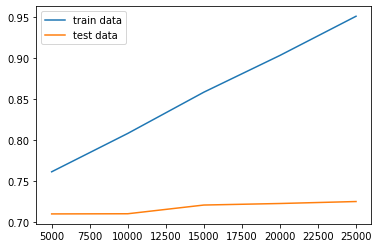

In [78]:
fig, rc = plt.subplots()
rc.plot(percentageArray, accuracyArray_train, label="train data")
rc.plot(percentageArray, accuracyArray_test, label="test data")
rc.legend()

plt.show()

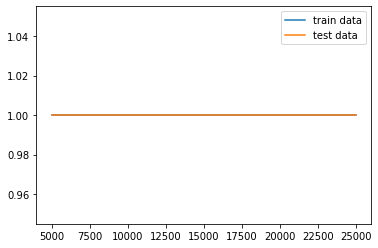

In [79]:
fig, acc = plt.subplots()
acc.plot(percentageArray, precisionArray_train, label="train data")
acc.plot(percentageArray, precisionArray_test, label="test data")
acc.legend()

plt.show()

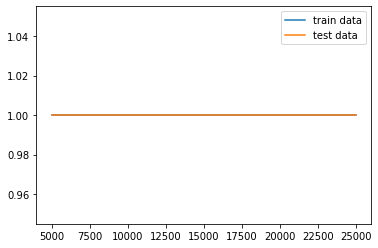

In [80]:
fig, pr = plt.subplots()
pr.plot(percentageArray, recallArray_train, label="train data")
pr.plot(percentageArray, recallArray_test, label="test data")
pr.legend()

plt.show()

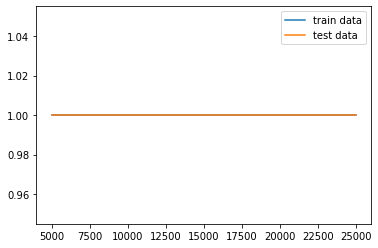

In [81]:
fig, f1 = plt.subplots()
f1.plot(percentageArray, f1Array_train, label="train data")
f1.plot(percentageArray, f1Array_test, label="test data")
f1.legend()

plt.show()